 ### Data Exploratory Analysis for Credit Card Data

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [6]:
# importing dataset

customer = pd.read_csv ("C:\\Users\\kavir\\OneDrive\\Documents\\Business Analytics\\python\\case study\\Case Study 2 - Credit Card Case Study\\Customer Acqusition.csv")
spend = pd.read_csv (r"C:\Users\kavir\OneDrive\Documents\Business Analytics\python\case study\Case Study 2 - Credit Card Case Study\spend.csv")
repayment = pd.read_csv (r"C:\Users\kavir\OneDrive\Documents\Business Analytics\python\case study\Case Study 2 - Credit Card Case Study\Repayment.csv")

##### Exploratory Data Analysis

In [7]:
customer.head(3)

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt


In [8]:
customer.drop ('No', axis = 1, inplace = True)

In [9]:
customer.isna().sum()

Customer    0
Age         0
City        0
Product     0
Limit       0
Company     0
Segment     0
dtype: int64

In [10]:
spend.head(3)

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46


In [11]:
spend.drop('Sl No:', axis = 1, inplace = True)

In [12]:
spend.isna().sum()

Customer    0
Month       0
Type        0
Amount      0
dtype: int64

In [13]:
repayment.head(3)

,SL No:,Customer,Month,Amount,Unnamed: 4
0,NaN,A1,12-Jan-04,495414.75,NaN
1,2.0,A1,3-Jan-04,245899.02,NaN
2,3.0,A1,15-Jan-04,259490.06,NaN


In [14]:
repayment.drop(['SL No:', 'Unnamed: 4'], axis = 1, inplace = True)

In [15]:
repayment.isna().sum()

Customer    23
Month       23
Amount      23
dtype: int64

In [16]:
repayment.dropna(inplace = True)

In [17]:
repayment.isna().sum()

Customer    0
Month       0
Amount      0
dtype: int64

##### 1.a. In case age is less than 18, replace it with mean of age values

In [18]:
customer.loc[customer.Age < 18, :].head()

,Customer,Age,City,Product,Limit,Company,Segment
13,A14,16,BANGALORE,Gold,500000.0,C14,Salaried_Pvt
40,A41,13,COCHIN,Platimum,500000.0,C23,Govt
62,A63,15,BANGALORE,Gold,500000.0,C25,Self Employed
67,A68,12,TRIVANDRUM,Silver,100000.0,C30,Self Employed
69,A70,16,BOMBAY,Platimum,10001.0,C32,Self Employed


In [19]:
customer.Age.mean()

46.49

In [20]:
customer.loc[customer.Age < 18] = customer.Age.mean()

In [21]:
customer.loc[customer.Age < 18, :]

,Customer,Age,City,Product,Limit,Company,Segment


In [22]:
customer.head()

,Customer,Age,City,Product,Limit,Company,Segment
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,A3,34.0,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,A4,47.0,BOMBAY,Platimum,10001.0,C4,Govt
4,A5,56.0,BANGALORE,Platimum,10002.0,C5,Normal Salary


##### 1.b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit. 

In [23]:
Customer_spend = pd.merge (left = customer, right = spend, on = 'Customer', how = 'inner')
Customer_spend.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3-Jan-04,PETRO,410556.13
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,15-Jan-04,CLOTHES,23740.46
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,25-Jan-04,FOOD,484342.47
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,17-Jan-05,CAMERA,369694.07


In [24]:
Customer_spend.shape

(1430, 10)

In [25]:
Customer_spend.loc[Customer_spend.Amount > Customer_spend.Limit]

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount
18,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,3-Jan-04,RENTAL,199554.72
19,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,28-Feb-05,TRAIN TICKET,376887.49
20,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,6-Apr-04,BUS TICKET,439648.53
21,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,23-Nov-04,PETRO,384078.73
22,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,3-Sep-05,JEWELLERY,117089.16
...,...,...,...,...,...,...,...,...,...,...
1417,A87,27.0,CALCUTTA,Silver,100003.0,C10,Govt,30-Mar-06,RENTAL,483886.62
1426,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,12-Jan-04,AUTO,139018.26
1427,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,3-Jan-04,SHOPPING,284521.06
1428,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,15-Jan-04,AIR TICKET,90184.22


In [26]:
Customer_spend.loc[Customer_spend.Amount > Customer_spend.Limit, 'Amount'] = Customer_spend.Limit * 50//100
Customer_spend

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3-Jan-04,PETRO,410556.13
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,15-Jan-04,CLOTHES,23740.46
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,25-Jan-04,FOOD,484342.47
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,17-Jan-05,CAMERA,369694.07
...,...,...,...,...,...,...,...,...,...,...
1425,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,25-Jan-04,BIKE,54729.66
1426,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,12-Jan-04,AUTO,5000.00
1427,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,3-Jan-04,SHOPPING,5000.00
1428,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,15-Jan-04,AIR TICKET,5001.00


##### 1.c. Incase the repayment amount is more than the limit, replace the repayment with the limit.

In [27]:
Customer_repay = pd.merge(customer, repayment, on = 'Customer', how = 'inner')
Customer_repay.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,495414.75
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3-Jan-04,245899.02
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,15-Jan-04,259490.06
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,25-Jan-04,437555.12
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,17-Jan-05,165972.88


In [28]:
Customer_repay.loc[Customer_repay.Amount > Customer_repay.Limit].head()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount
18,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,3-Jan-04,185955.07
19,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,28-Feb-05,412783.34
20,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,6-Apr-04,148038.67
21,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,23-Nov-04,179144.68
23,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,3-Aug-05,381635.66


In [29]:
Customer_repay.loc[Customer_repay.Amount > Customer_repay.Limit, 'Amount'] = Customer_repay.Limit

In [30]:
Customer_repay.loc[Customer_repay.Amount > Customer_repay.Limit].head()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount


##### 2.a. How many distinct customers exist?

In [31]:
customer['Customer'].nunique()

95

##### 2.b.How many distinct categories exist?

In [32]:
customer.Segment.nunique()

# different segments to which customers belong

6

##### 2.c. What is the average monthly spend by customers?

In [33]:
Customer_spend.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3-Jan-04,PETRO,410556.13
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,15-Jan-04,CLOTHES,23740.46
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,25-Jan-04,FOOD,484342.47
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,17-Jan-05,CAMERA,369694.07


In [34]:
# conversion

Customer_spend.Month = pd.to_datetime(Customer_spend.Month)

# new columns for month and year

Customer_spend['month_date'] = Customer_spend.Month.dt.strftime ('%b')
Customer_spend['year_date'] = Customer_spend.Month.dt.year

In [35]:
Customer_spend.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount,month_date,year_date
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,Jan,2004
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13,Jan,2004
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,CLOTHES,23740.46,Jan,2004
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,FOOD,484342.47,Jan,2004
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,CAMERA,369694.07,Jan,2005


In [36]:
Avg_spend = pd.DataFrame(Customer_spend.groupby(['year_date','month_date']).Amount.mean().round(2))
Avg_spend

Amount
year_date month_date           
2004      Apr         112093.85
          Feb         136998.19
          Jan         140253.19
          Mar         133708.02
          May         153326.85
          Nov          79641.90
          Sep         171579.23
2005      Apr         144227.21
          Aug         137378.12
          Dec          84415.89
          Feb         149985.68
          Jan         176279.34
          Jul         112725.17
          Jun         186341.78
          May         151822.45
          Nov         157902.30
          Oct          89879.31
          Sep         109423.67
2006      Apr         128636.50
          Aug         213863.92
          Dec         139378.91
          Feb         148892.73
          Jan         136312.52
          Jul         186157.30
          Jun         155971.50
          Mar         131356.01
          May         141667.04
          Nov         146279.69
          Oct         153530.93
          Sep         131854.30

##### 2.d. What is the average monthly repayment by customers?

In [111]:
Customer_repay.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount,monthly,yearly
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,495414.75,Jan,2004
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,245899.02,Jan,2004
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,259490.06,Jan,2004
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,437555.12,Jan,2004
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,165972.88,Jan,2005


In [38]:
# conversion

Customer_repay.Month = pd.to_datetime(Customer_repay.Month)

# new columns

Customer_repay['month_date'] = Customer_repay.Month.dt.strftime ('%b')
Customer_repay['year_date'] = Customer_repay.Month.dt.year

In [39]:
Customer_repay.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount,month_date,year_date
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,495414.75,Jan,2004
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,245899.02,Jan,2004
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,259490.06,Jan,2004
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,437555.12,Jan,2004
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,165972.88,Jan,2005


In [40]:
Avg_repay = pd.DataFrame(Customer_repay.groupby(['year_date','month_date']).Amount.mean().round(2))
Avg_repay

Amount
year_date month_date           
2004      Apr         159157.06
          Feb         125612.51
          Jan         156890.24
          Mar         172261.84
          May         128479.61
          Nov         127738.77
          Sep         118926.03
2005      Apr         121163.45
          Aug         158072.72
          Dec         179119.05
          Feb         153896.62
          Jan         175186.76
          Jul         149944.93
          Jun         101551.66
          May         196418.11
          Nov         162164.22
          Oct         136268.27
          Sep          79873.59
2006      Apr         181708.23
          Aug         158183.53
          Dec         184098.66
          Feb         193750.10
          Jan         204422.04
          Jul         173713.63
          Jun         165429.07
          Mar         153006.88
          May         169762.37
          Nov         147857.98
          Oct         203969.59
          Sep         175090.36

##### 2.f. What are the top 5 product types?

In [41]:
Customer_spend.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount,month_date,year_date
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,Jan,2004
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13,Jan,2004
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,CLOTHES,23740.46,Jan,2004
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,FOOD,484342.47,Jan,2004
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,CAMERA,369694.07,Jan,2005


In [42]:
prod_type = Customer_spend.groupby('Type')['Amount'].sum().reset_index()

In [43]:
prod_type.sort_values(by = 'Amount', ascending = False, ignore_index = True).head()

,Type,Amount
0,PETRO,27592349.91
1,CAMERA,25071434.58
2,FOOD,19030736.17
3,TRAIN TICKET,18986947.89
4,AIR TICKET,18031719.32


##### 2.g. Which city is having maximum spend?

In [44]:
city_spend = Customer_spend.groupby('City')['Amount'].sum().reset_index()
city_spend.head()

,City,Amount
0,BANGALORE,31998032.06
1,BOMBAY,28593113.88
2,CALCUTTA,41108121.30
3,CHENNAI,22128629.65
4,COCHIN,38624193.56


In [45]:
city_spend.sort_values(by = 'Amount', ascending = False).head(1)

,City,Amount
2,CALCUTTA,41108121.3


##### 2.h. Which age group is spending more money?

In [46]:
Customer_spend.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount,month_date,year_date
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,Jan,2004
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13,Jan,2004
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,CLOTHES,23740.46,Jan,2004
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,FOOD,484342.47,Jan,2004
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,CAMERA,369694.07,Jan,2005


In [47]:
age_spend = Customer_spend.groupby('Age')['Amount'].sum().reset_index()
age_spend.head()

,Age,Amount
0,19.0,70014.00
1,21.0,7662240.89
2,24.0,6948235.19
3,25.0,9749700.72
4,26.0,803691.85


In [48]:
age_spend.sort_values(by = 'Amount', ascending = False).head(1)

,Age,Amount
6,28.0,17365270.23


##### 2.i. Who are the top 10 customers in terms of repayment?

In [49]:
Customer_repay.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount,month_date,year_date
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,495414.75,Jan,2004
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,245899.02,Jan,2004
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,259490.06,Jan,2004
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,437555.12,Jan,2004
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,165972.88,Jan,2005


In [50]:
repay_cust = Customer_repay.groupby('Customer')['Amount'].sum().reset_index()
repay_cust.head()

,Customer,Amount
0,A1,4753691.67
1,A10,3695647.52
2,A100,69551.19
3,A11,5310934.03
4,A12,8334760.16


In [51]:
repay_cust.sort_values(by = 'Amount', ascending = False, ignore_index = True).head(10)

,Customer,Amount
0,A61,10539142.91
1,A60,9876290.74
2,A13,9572000.66
3,A43,8489871.46
4,A45,8448334.87
5,A12,8334760.16
6,A44,7744730.12
7,A39,7622483.30
8,A42,7615460.86
9,A38,7470956.35


##### 3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.

In [52]:
Customer_spend.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount,month_date,year_date
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,Jan,2004
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13,Jan,2004
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,CLOTHES,23740.46,Jan,2004
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,FOOD,484342.47,Jan,2004
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,CAMERA,369694.07,Jan,2005


In [53]:
Yearly_spend = pd.DataFrame (Customer_spend.groupby(['City','Product','year_date'])['Amount'].sum())
Yearly_spend.head()

Amount
City      Product  year_date            
BANGALORE Gold     2004       7460145.61
                   2005       8706615.03
                   2006       9582502.52
          Platimum 2004       1112727.80
                   2005        912281.97

In [54]:
pivot_table = Yearly_spend.pivot_table(index=["City", "year_date"], columns="Product", values="Amount", fill_value=0)
pivot_table.head()

Product                    Gold    Platimum      Silver
City      year_date                                    
BANGALORE 2004       7460145.61  1112727.80  1291845.58
          2005       8706615.03   912281.97   830606.84
          2006       9582502.52   685829.77  1415476.94
BOMBAY    2004       6987853.53   897260.44   532089.03
          2005       8983018.28   706800.94   508988.04

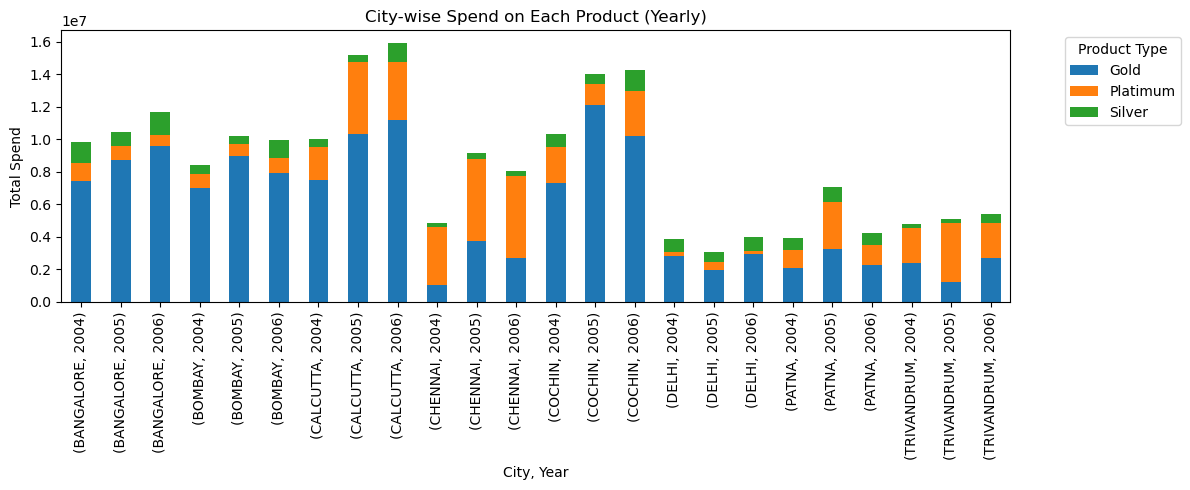

In [55]:
pivot_table.plot(kind = 'bar', stacked = True, figsize=(12, 5))
plt.title('City-wise Spend on Each Product (Yearly)')
plt.xlabel('City, Year')
plt.ylabel('Total Spend')
plt.legend(title="Product Type", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

##### 4. a. Create graphs for Monthly comparison of total spends, city wise

In [56]:
Customer_spend.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount,month_date,year_date
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,Jan,2004
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13,Jan,2004
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,CLOTHES,23740.46,Jan,2004
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,FOOD,484342.47,Jan,2004
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,CAMERA,369694.07,Jan,2005


In [58]:
monthly_city_spend = Customer_spend.groupby(['month_date', 'City'])['Amount'].sum()
monthly_city_spend

month_date  City      
Apr         BANGALORE     3199799.25
            BOMBAY        1873784.51
            CALCUTTA      3457507.45
            CHENNAI       2518656.49
            COCHIN        2892766.29
                             ...    
Sep         CHENNAI        745758.90
            COCHIN        1079511.70
            DELHI           50001.00
            PATNA           70329.95
            TRIVANDRUM     186063.20
Name: Amount, Length: 96, dtype: float64

In [60]:
monthly_city_spend = pd.pivot_table(data = Customer_spend , values = 'Amount', index = 'City', columns = 'month_date', aggfunc = sum)
monthly_city_spend

month_date,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
City,,,,,,,,,,,,
BANGALORE,3199799.25,505044.52,132282.51,4775575.45,7673147.76,1665883.52,960188.20,4924191.80,5197132.75,1692958.55,677315.67,594512.08
BOMBAY,1873784.51,1066744.75,140040.21,4271985.80,5948990.33,177726.32,1172594.97,5222848.50,3891942.60,2872048.40,676005.20,1278402.29
CALCUTTA,3457507.45,1548353.52,55001.00,8150544.11,9064862.40,2234573.27,2293045.31,4939037.04,5578246.87,2078879.43,196357.83,1511713.07
CHENNAI,2518656.49,305875.97,223628.27,4385815.45,4466960.36,693825.27,1244242.16,3183642.21,2856198.12,1347779.28,156247.17,745758.90
COCHIN,2892766.29,2111348.93,909532.55,4602108.17,9807995.73,1246456.16,2495745.07,5008971.34,5611377.45,1989828.28,868551.89,1079511.70
DELHI,777240.25,155401.66,842341.52,1494063.06,2714259.95,50001.00,511275.59,2267148.52,1600321.57,391610.46,64615.46,50001.00
PATNA,2338179.53,419383.64,50000.00,2353333.55,4916205.55,50000.00,746186.13,1437166.61,2136586.80,413677.87,329537.34,70329.95
TRIVANDRUM,1199289.45,453772.94,640922.26,2857119.89,3694667.01,260483.50,400336.33,2342313.01,2813530.98,143386.40,285581.92,186063.20


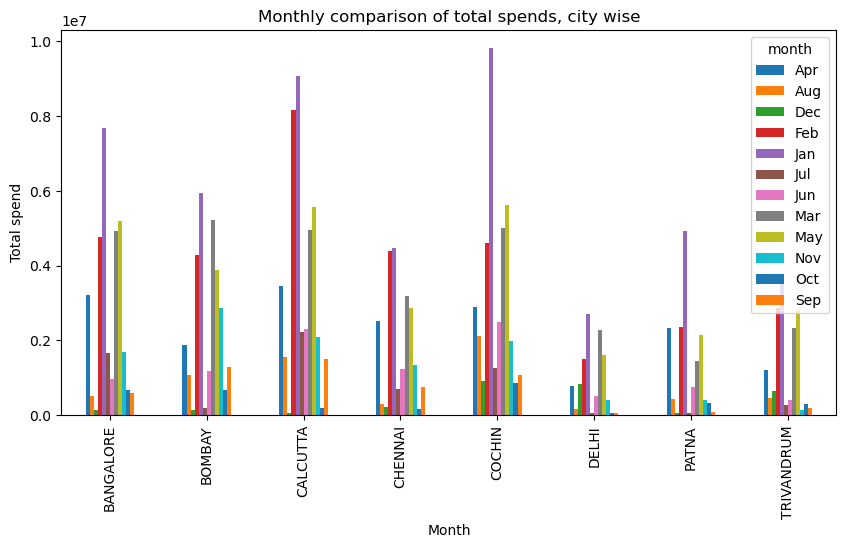

In [85]:
monthly_city_spend.plot (kind = 'bar', figsize = (10,5))
plt.title('Monthly comparison of total spends, city wise')
plt.xlabel ('Month')
plt.ylabel ('Total spend')
plt.legend (title = 'month', loc = 'upper right')
plt.show ()

##### 4. b. Comparison of yearly spend on air tickets

In [63]:
Customer_spend.head(3)

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount,month_date,year_date
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,Jan,2004
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13,Jan,2004
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,CLOTHES,23740.46,Jan,2004


In [65]:
Yearly_data = Customer_spend.groupby (['year_date', 'Type']).Amount.sum().reset_index()
Yearly_data.head()

,year_date,Type,Amount
0,2004,AIR TICKET,3882506.22
1,2004,AUTO,254744.78
2,2004,BIKE,476635.28
3,2004,BUS TICKET,5054186.73
4,2004,CAMERA,9756726.18


In [67]:
air_tic = Yearly_data.loc[Yearly_data.Type == 'AIR TICKET', :]

In [75]:
air_tic

,Type,Amount
year_date,,
2004,AIR TICKET,3882506.22
2005,AIR TICKET,9284647.73
2006,AIR TICKET,4864565.37


In [ ]:
air_tic.set_index('year_date', inplace = True)

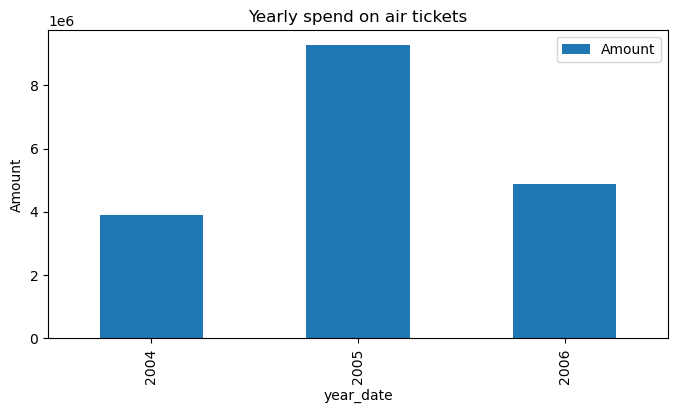

In [76]:

air_tic.plot (kind = 'bar', figsize = (8,4))
plt.title ('Yearly spend on air tickets')
plt.xlabel ('year_date')
plt.ylabel ('Amount')
plt.show()

##### 4. c. Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)

In [78]:
Customer_spend.head(2)

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount,month_date,year_date
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,Jan,2004
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13,Jan,2004


In [81]:
prod_month_spend = Customer_spend.groupby(['Product','month_date']).Amount.sum().reset_index()
prod_month_spend.head(3)

,Product,month_date,Amount
0,Gold,Apr,11897511.09
1,Gold,Aug,4764013.99
2,Gold,Dec,2043056.73


In [83]:
prod_month_spend = pd.pivot_table(data = prod_month_spend, index = 'Product', columns = 'month_date',
values = 'Amount', aggfunc = sum)

KeyError: 'Amount'

In [84]:
prod_month_spend.head()

month_date,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
Product,,,,,,,,,,,,
Gold,11897511.09,4764013.99,2043056.73,22820263.74,31045190.75,4605083.70,6168365.44,18818264.21,20362191.38,8635623.44,2603937.44,3708381.42
Platimum,4457395.48,1508803.12,750154.19,7983270.37,13045192.70,1243714.62,2965711.21,6647656.99,7182214.25,1603444.10,550274.04,1365108.64
Silver,1902316.65,293108.82,200537.40,2087011.37,4196705.64,530150.72,689537.11,3859397.83,2140931.51,691101.13,100001.00,442802.13


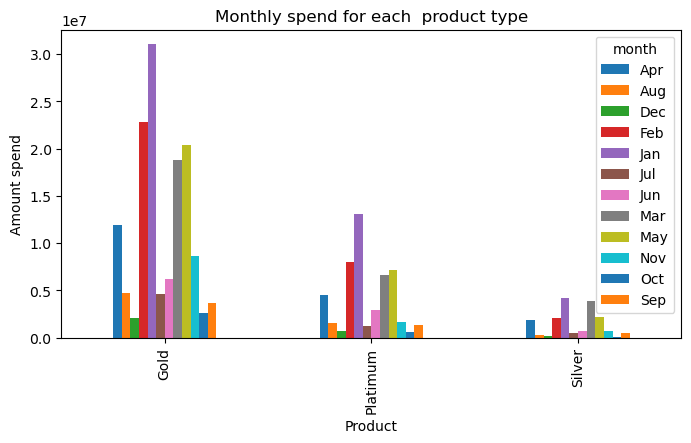

In [87]:
prod_month_spend.plot(kind = 'bar', figsize = (8,4))
plt.title ("Monthly spend for each  product type")
plt.xlabel ("Product")
plt.ylabel ("Amount spend")
plt.legend (title = "month", loc = "upper right")
plt.show()

###### from the above graph it is observed that for every product type the highest spend was in the month of 'January'

##### 5.  Write UDF to perform the following analysis: You need to find top 10 customers for each city in terms of their repayment amount by different products and by different time periods i.e. year or month. The user should be able to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the function should automatically take these inputs while identifying the top 10 customers.

In [89]:
Customer_repay.rename (columns = {'month_date' : 'monthly', 'year_date' : 'yearly'}, inplace = True)

In [90]:
Customer_repay.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount,monthly,yearly
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,495414.75,Jan,2004
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,245899.02,Jan,2004
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,259490.06,Jan,2004
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,437555.12,Jan,2004
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,165972.88,Jan,2005


In [109]:
def summary(product,timeperiod):
    
    if product.lower()=='gold' and timeperiod.lower()=='monthly':
        pivot = Customer_repay.pivot_table(index=['Product','City','Customer'],columns='monthly',aggfunc='sum',values='Amount')
        result = pivot.loc[('Gold',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    elif product.lower()=='gold' and timeperiod.lower()=='yearly':
        pivot = Customer_repay.pivot_table(index=['Product','City','Customer'],columns='yearly',aggfunc='sum',values='Amount')
        result = pivot.loc[('Gold',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    elif product.lower()=='silver' and timeperiod.lower()=='monthly':
        pivot = Customer_repay.pivot_table(index=['Product','City','Customer'],columns='monthly',aggfunc='sum',values='Amount')
        result = pivot.loc[('Silver',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    elif product.lower()=='silver' and timeperiod.lower()=='yearly':
        pivot = Customer_repay.pivot_table(index=['Product','City','Customer'],columns='yearly',aggfunc='sum',values='Amount')
        result = pivot.loc[('Silver',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    if product.lower()=='platinum' and timeperiod.lower()=='monthly':
        pivot = Customer_repay.pivot_table(index=['Product','City','Customer'],columns='monthly',aggfunc='sum',values='Amount')
        result = pivot.loc[('Platinum',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    elif product.lower()=='platinum' and timeperiod.lower()=='yearly':
        pivot = Customer_repay.pivot_table(index=['Product','City','Customer'],columns='yearly',aggfunc='sum',values='Amount')
        result = pivot.loc[('Platinum',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    return result

summary ('Gold', 'yearly')

yearly                             2004        2005        2006
Product City       Customer                                    
Gold    BANGALORE  A1        2359797.84  1529158.77   864735.06
                   A13       2337012.77  3757673.00  3477314.89
                   A30        978777.17  2667746.38  2486958.41
                   A43       1906497.47  4006956.60  2576417.39
                   A81              NaN         NaN   207780.32
                   A88              NaN         NaN   146821.30
                   A92              NaN         NaN   459105.69
        COCHIN     A11        958556.39  2045470.88  2306906.76
                   A16       1122211.16  1226247.16  1911369.63
                   A32        344312.67   696673.46  1517308.65
                   A45       2557947.39  4042447.57  1847939.91
                   A61       2518154.95  4276860.55  3744127.41
                   A65        468922.60   230667.34         NaN
                   A94        153465.89         NaN         NaN
        CALCUTTA   A10        892190.53  1246843.93  1556613.06
                   A15       1051502.61  1720768.79  2783141.43
                   A29       1376793.94  1706779.22  3434298.00
                   A31        407599.13  1448641.71  1527798.41
                   A60       2890721.81  3742856.10  3242712.83
                   A89              NaN         NaN   497237.97
        BOMBAY     A12       2339080.90  2877588.30  3118090.96
                   A17       1425448.02   731143.83  3127783.14
                   A42       3045914.71  3125758.43  1443787.72
                   A62       1744114.25  1541617.21  1684085.69
                   A91              NaN         NaN   247781.00
        CHENNAI    A27       1842823.04  2782591.71  2387485.81
                   A67         67845.60    55638.77         NaN
        TRIVANDRUM A28        965108.49  2827009.82  3376614.65
        PATNA      A26       1490427.84  2433837.95  3330421.30
                   A66        477039.78         NaN   113094.58
                   A95        369405.96         NaN         NaN
        DELHI      A44       2149383.50  4165317.77  1430028.85
                   A64              NaN         NaN   323229.09
                   A82              NaN         NaN   342200.74
                   A93        342326.14         NaN         NaN